In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("train_data.csv")

In [4]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [6]:
df.tail()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
7155,H5290,2012,1.000000,1,V,V,V,U,NaN,1,2001.0,.,NaN,0
7156,H5926,2013,1.000000,0,V,V,V,U,NaN,2,1980.0,.,NaN,1
7157,H6204,2016,0.038251,0,V,V,V,U,NaN,1,1992.0,.,NaN,0
7158,H6537,2013,1.000000,0,V,V,V,U,NaN,1,1972.0,.,NaN,0
7159,H7470,2014,1.000000,0,V,V,V,U,NaN,1,2004.0,.,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.3+ KB


In [7]:
pd.unique(df['NumberOfWindows'])

array(['   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'],
      dtype=object)

In [8]:
pd.unique(df['Geo_Code'])

array(['1053', '1143', '1160', ..., '2B096', '2B353', nan], dtype=object)

In [9]:
pd.unique(df['Building_Painted'])

array(['N', 'V'], dtype=object)

In [39]:
#Strip spaces and handle cases in the 'NumberofWindows' column
df['NumberOfWindows'] = df['NumberOfWindows'].astype(str).str.strip().replace({
    '.': np.nan,
    '>=10': 10
}).astype(float)

In [40]:
numerical_columns= df.select_dtypes(include=['float64','int64']).columns
categorical_column = df.select_dtypes(include=['object']).columns

In [41]:
numerical_impute = SimpleImputer(strategy ='median')

In [42]:
for col in numerical_columns:
    df[col] = numerical_impute.fit_transform(df[[col]])

In [48]:
for col in categorical_column:
    df[col] = df[col].fillna(df[col].mode()[0])

In [49]:
label = LabelEncoder()

In [50]:
for col in categorical_column:
    df[col] = label.fit_transform(df[col])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   float64
 1   YearOfObservation   7160 non-null   float64
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   float64
 4   Building_Painted    7160 non-null   float64
 5   Building_Fenced     7160 non-null   float64
 6   Garden              7160 non-null   float64
 7   Settlement          7160 non-null   float64
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   float64
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   float64
 12  Geo_Code            7160 non-null   float64
 13  Claim               7160 non-null   float64
 14  NumberofWindows     7160 non-null   float64
dtypes: float64(15)
memory usage: 839.2 KB


In [52]:
df.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim,NumberofWindows
0,1076.0,2013.0,1.0,0.0,0.0,1.0,1.0,1.0,290.0,1.0,1960.0,4.0,7.0,0.0,4.0
1,4056.0,2015.0,1.0,0.0,1.0,0.0,0.0,0.0,490.0,1.0,1850.0,4.0,7.0,0.0,4.0
2,4990.0,2014.0,1.0,0.0,0.0,1.0,1.0,1.0,595.0,1.0,1960.0,4.0,7.0,0.0,4.0
3,5006.0,2013.0,1.0,0.0,1.0,1.0,1.0,1.0,2840.0,1.0,1960.0,4.0,7.0,0.0,4.0
4,5774.0,2014.0,1.0,0.0,1.0,0.0,0.0,0.0,680.0,1.0,1800.0,3.0,7.0,0.0,3.0


In [54]:
#Defining features and target variable
X = df.drop(columns =['Customer Id', 'Claim'])
y = df['Claim']

In [56]:
#Splitting data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [57]:
#Build and train the logidtic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [58]:
#Evaluate the model
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [59]:
#y_test, y_pred, and y_pred_prob are defined
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", round(roc_auc,2))
print("acuracy:", str(round(accuracy,2) * 100) + "%")

Confusion Matrix:
 [[1615   41]
 [ 426   66]]
ROC AUC Score: 0.71
acuracy: 78.0%


In [60]:
#Print the classification report
classification_report_output = classification_report(y_test, y_pred)
print(classification_report_output)

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      1656
         1.0       0.62      0.13      0.22       492

    accuracy                           0.78      2148
   macro avg       0.70      0.55      0.55      2148
weighted avg       0.75      0.78      0.72      2148



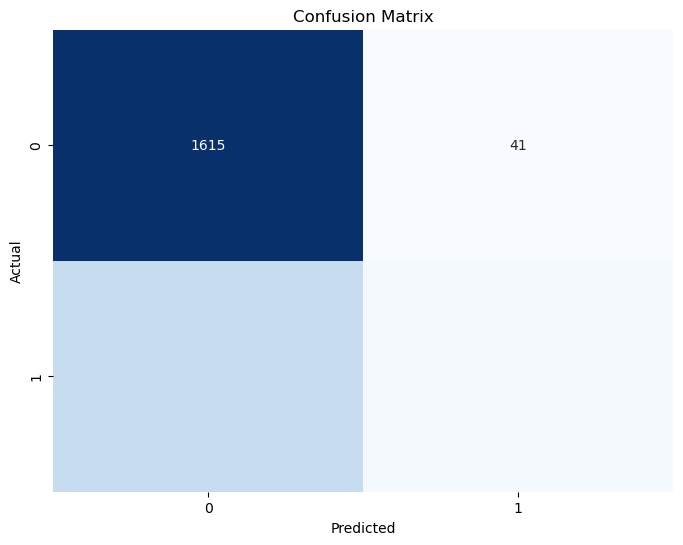

In [63]:
#Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Saving the Model using Pickle

In [64]:
#Save the model to a file
pickle_file = 'logistic_regression_model.pkl'
with open(pickle_file, 'wb') as file:
    pickle.dump(model, file)

#Load the model from the file
with open(pickle_file, 'rb') as file:
    loaded_model = pickle.load(file)


#Evaluate the model
y_pred = loaded_model.predict(X_test)
y_pred_prob = loaded_model.predict_proba(X_test)[:, 1]

rou_auc = roc_auc_score(y_test, y_pred_prob)

#Print the classification report
classification_report_output = classification_report(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.78


#### Another Method to Save the Model

In [65]:
#Save the model to a file
joblib_file ='logistic_regression_model.joblib'
joblib.dump(model, joblib_file)

['logistic_regression_model.joblib']

In [67]:
#Load the model from the file 
loaded_model = joblib.load(joblib_file)

In [68]:
#Evaluate the model
y_pred = loaded_model.predict(X_test)
y_pred_prob = loaded_model.predict_proba(X_test)[:, 1]

rou_auc = roc_auc_score(y_test, y_pred_prob)

In [69]:
#Print the classification report
classification_report_output = classification_report(y_test, y_pred)
accuracy = round(accuracy_score(y_test, y_pred),2)
print(accuracy)

0.78


### OOP APPROACH FOR THE MODEL CREATION 

In [75]:
class MachineLearningPipeline:
    def __init__(self, model_path):
        self.model_path = model_path
        self.model = None
        self.label_encoders = None
    
    def load_data(self, data_path):
        #Load the dataset
        return pd.read_csv(data_path)
    
    def preprocess_data(self,data, training=True):
        #Identify numerical and categorical columns
        numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
        categorical_columns = data.select_dtypes(include=['object']).columns
        
        #Impute missing values for numerical columns
        numerical_imputer = SimpleImputer(strategy='median')
        for col in numerical_columns:
            data[col] = numerical_imputer.fit_transform(data[[col]])
        
        #Impute missing values for categorical columns
        for col in categorical_columns:
            data[col] = data[col].fillna(data[col].mode()[0])
        
        #Convert categorical variables to numerical using LabelEncoder
        self.label_encoders ={}
        for col in categorical_columns:
            le = LabelEncoder()
            data[col] =le.fit_transform(data[col])
            self.label_encoders[col] = le
       
        if training:
            #Split the data into features and target
            X = data.drop(['Customer Id', 'Claim'], axis=1)
            y = data['Claim']
            return X, y
        else: 
            #For new data prediction
            X_new = data.drop(['Customer Id'], axis =1)
            return X_new
    
    
    def train_model(self, X, y):
        #Train a logistic regression model
        self.model = LogisticRegression(max_iter=1000)
        self.model.fit(X, y)
   
    def save_model(self):
        #Save the model to a file
        with open(self.model_path, 'wb')as file:
            pickle.dump(self.model,file)
    
    def evaluate_model(self, X,y):
        #Predict and evaluate the model
        y_pred = self.model.predict(X)
        y_pred_prob = self.model.predict_proba(X)[:,1]
       
        
        conf_matrix = confusion_matrix(y, y_pred)
        roc_auc = round(roc_auc_score(y, y_pred_prob),2)
        classification_report_output = classification_report(y, y_pred)
        accuracy = round(accuracy_score(y,y_pred),2) * 100
        
        
        print('Confusion Matrix:')
        print(conf_matrix)
        print('\nROC AUC Score:')
        print(roc_auc)
        print('\nClassification Report:')
        print(classification_report_output)
        print(f'\nAccuracy: {accuracy} %')
   
    
    def load_model(self):
        #Load the model from a file
        with open(self.model_path, 'rb') as file:
            self.mode = pickle.load(file)

#Usage 
pipeline = MachineLearningPipeline('logistic_regression_model.pkl')
data = pipeline.load_data("train_data.csv")
X, y = pipeline.preprocess_data(data, training=True)

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Train model
pipeline.train_model(X_train, y_train)
pipeline.save_model()

#Evaluate model
pipeline.evaluate_model(X_test, y_test)

#Load model
pipeline.load_model()

Confusion Matrix:
[[1625   35]
 [ 424   64]]

ROC AUC Score:
0.72

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.88      1660
         1.0       0.65      0.13      0.22       488

    accuracy                           0.79      2148
   macro avg       0.72      0.56      0.55      2148
weighted avg       0.76      0.79      0.73      2148


Accuracy: 79.0 %


**PROCEDURAL APPROACH FOR MODEL CREATION**